In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))
from math import log, floor, sqrt
from time import time
from random import random, randint
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline


#round val to sigFigs significant figures. Return actual (altered) value (not string)
def round_sig(val, sigFigs=3):
    decimalPos = 0 if val==0 else -int(floor(log(abs(val),10)))
    return round(val, decimalPos + sigFigs - 1)

#same as from bisect import bisect_left. But it's stupid simple
def my_bisect(seq, elem):
    bisectPos = 0
    lng = len(seq)
    while bisectPos < lng:
        if elem < seq[bisectPos]:
            return bisectPos
        bisectPos += 1
    return lng

In [246]:
""" prime numbers """
N = 1000000
global workCount
workCount = 0

#sieve of eratosthenes
#multiples of (prime) numbers are not prime. Scan a range and check each multiple in that range. only primes remain
#time: ~N log(N)
#space: ~N
#check: O(1)
#pro: direct lookup if value is prime. fastest way to calculate all primes to N
#con: cannot lookup if N+1 is prime, kinda gotta start over and sieve up to N+1. takes up huge space for large N
def build_prime_lookup(N):
    #global workCount
    #workCount = 0
    isPrimeList = [True]*(N+1)   #if isPrimeList[elemNo] = True, then elemNo (the integer) is prime. Initially numbers assumed prime
    for baseNo in range(2,N):
        if not isPrimeList[baseNo]:
            continue

        endSieve = N//baseNo+1
        for multNo in range(baseNo, endSieve):
            #workCount += 1
            isPrimeList[multNo*baseNo] = False
        #print('base:',testNo, 'mults:', [testNo, endSieve])
        
    return isPrimeList

def check_prime_lookup(testVal, primeLookup):
    if 0 <= testVal < len(primeLookup):
        return primeLookup[testVal]
    return True  #actually we don't know. error
    

#I dunno if this has a name but a prime number has no prime divisors 
#we work our way up. checking if any of our orimes divides the next testNo. Once we get up to sqrt(testNo) we know it's prime
#time: > ~N sqrt(N) ?
#space: ~sqrt(N) ?
#check: O(N) (either scan table or )
#pro: given primes(0-N) can easily check primeness for numbers up to N^2. Easy to extend prime list/cache
#con: slower to calculate full list, takes work to check numbers for primeness
def build_prime_list(maxPrime, prList=[]):
    #global workCount
    #workCount = 0
    if prList is None or prList == []:
        prList = [2]
    startVal = prList[-1] + 1  #allow extending existing primeList. in such case start at last known prime
    for testNo in range(startVal,maxPrime+1):        
        #if check_prime_list(testNo, prList):
        #    prList.append(testNo)
        sqrtVal = int(sqrt(testNo))
        for divVal in prList:
            if testNo % divVal == 0:
                break
            if divVal > sqrtVal:
                prList.append(testNo)
                break

    return prList

#using existing primeList, check if val is prime. return True if prime, False if not prime
def check_prime_list(testVal, pList):
    #global workCount
    sqrtVal = floor(sqrt(testVal))
    for divVal in pList:
        #workCount += 2
        #if divNo divides testNo, then testNo is not prime
        if testVal % divVal == 0:
            return False
        #if we've reached divNo > sqrt(testNo), then testNo is prime
        #if divVal * divVal > testVal0:
        if divVal > sqrtVal:
            return True
    
    return False # arriving here suggests primeList lacks sufficient range to check this number... error


#naive, single prime lookup. No need to precalculate anything
def check_single_prime(testVal):
    #sqrtVal = floor(sqrt(testVal))
    if testVal % 2 == 0:
        return False
    
    #for divVal in range(3, sqrtVal+1, 2):
    #    if testVal % divVal == 0:
    #        return False
        
    for divVal in range(3, testVal, 2):
        if testVal % divVal == 0:
            return False
        if divVal * divVal > testVal:
            return True

    return True

tStart = time()
primeLookup = build_prime_lookup(N)  
tEnd = time()
print('Erato Sieve ','[0 - '+str(N)+']:',str(round_sig(tEnd-tStart,2))+'s', ' work:', round_sig(workCount),' space:',N)

tStart = time()
primeList = build_prime_list(N)  
tEnd = time()
print('Cache primes','[0 - '+str(N)+']:',str(round_sig(tEnd-tStart,2))+'s', ' work:', round_sig(workCount),' space:', len(primeList))

tStart = time()
myPrimes=[]
for x in range(N):
    if check_single_prime(x):
        myPrimes.append(x)
tEnd = time()
print('Check each  ','[0 - '+str(N)+']:',str(round_sig(tEnd-tStart,2))+'s', ' work:', round_sig(workCount),' space:', 0)


Erato Sieve  [0 - 1000000]: 0.32s  work: 0  space: 1000000
Cache primes [0 - 1000000]: 2.8s  work: 0  space: 78498
Check each   [0 - 1000000]: 6.3s  work: 0  space: 0


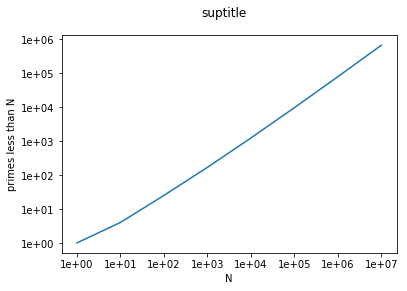

In [241]:
""" prime numbers - visualization """
nVals = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
pCount = [0]*len(nVals)

pList = []
for idxNo in range(len(nVals)):
    n = nVals[idxNo]
    pList = build_prime_list(n, pList)
    pCount[idxNo] = len(pList)

logNVals = [log(x,10) for x in nVals]
logPCount = [log(x,10) for x in pCount]

fig = plt.figure(figsize=(6,4))
fig.suptitle('suptitle', fontsize=12)
ax = fig.add_subplot(111)
ax.set_xlabel('N')
ax.set_ylabel('primes less than N')
ax.set_xticks(logNVals)  #we're plotting log/log, tickvalues are log(actual)
ax.set_yticks(logNVals)  #x and y are same scale, this doesn't depend on the values we're plotting
ax.set_xticklabels(['{:0.0e}'.format(x) for x in nVals])  #ticklabels are true values, format in scientific notation
ax.set_yticklabels(['{:0.0e}'.format(x) for x in nVals])
plt.plot(logNVals, logPCount)
plt.show()

In [138]:
""" closest points """
class Point:
    def __init__(self, _x, _y):
        self.x = _x
        self.y = _y
    
    def dist_sqrd(self, otherPt):
        return (otherPt.x - self.x) ** 2 + (otherPt.y - self.y) ** 2

    def dist_from(self, otherPt):
        return sqrt( self.dist_sqrd(otherPt) )
    
    def __str__(self):
        return '['+str(self.x)+', '+str(self.y)+']'
N = 100
minDist = .5
pts = [Point(random(),random()) for x in range(N)]


t0 = time()
pairCount = N**2 / 2
medianCalc = []
closePointCount = 0
totDist = 0
for ptNo1 in range(N):
    for ptNo2 in range(ptNo1+1,N):
        dist = pts[ptNo1].dist_from(pts[ptNo2])
        totDist += dist
        medianCalc.append(dist)
        if dist < minDist:
            closePointCount += 1
            #print(pts[ptNo1], ' - ', pts[ptNo2])

print('t:',str(round_sig(time()-t0,2))+'s')
medianCalc.sort()
print('points within thresh:', closePointCount, '/', pairCount, ' ', str(round_sig(100*closePointCount/pairCount,3))+'%')
print('avg dist:', totDist / pairCount)
print('median dist:',medianCalc[int(pairCount/2)])  #technically we take average or pC/2 and pC/2-1 if even number


class PointNode:
    def __init__(self, _pt=Point(0,0), _next=None):
        self.point = _pt
        self.next = _next


t0 = time()
closePointCount = 0
#we break up the domain into a grid with spacing minDim. thus grid has dimensions [gridDim+2,gridDim+2]. We have a 1 square buffer around the edges...
#We index into the matrix by multiplying the pt by gridDim, + 1 for the buffer, cast to int
gridDim = int(1/minDist + 0.5)
grid = [[None]*(gridDim+2) for idx in range(gridDim+2)]

for pt in pts:
    #get grid coordinates for pt's home
    X = int(pt.x*gridDim)
    Y = int(pt.y*gridDim)

    # we only need to check +/- 1 grid element (grid element width = minDist) for close points
    for colNo in range(X-1,X+2):
        for rowNo in range(Y-1,Y+2):
            gridLinkNode = grid[rowNo][colNo]
            #loop over all points in subgrid box. We could also use another list at each coord, but this linked list is nifty
            while gridLinkNode is not None:
                if pt.dist_from(gridLinkNode.point) < minDist:
                    closePointCount += 1
                    #print(pt,' - ', gridLinkNode.point)
                gridLinkNode = gridLinkNode.next
    
    grid[Y][X] = PointNode(pt, grid[Y][X])  #add the point to its grid element's linkedlist

print('t:',str(round_sig(time()-t0,2))+'s')
print('points within thresh:', closePointCount, '/', pairCount, ' ', str(round_sig(100*closePointCount/pairCount,3))+'%')

t: 0.016s
points within thresh: 2237 / 5000.0   44.7%
avg dist: 0.5291195388336213
median dist: 0.540844113721272
t: 0.016s
points within thresh: 2237 / 5000.0   44.7%


In [ ]:
""" closest points """
for row in grid:
    rowStr = ''
    for elem in row:
        if elem is None:
            rowStr += '\t . '
        else:
            rowStr += '\t'
            node = elem
            rowStr += str(int(round_sig(100*node.point.x,2))) + ',' + str(int(round_sig(100*node.point.y,2)))
            while node.next is not None:
                node = node.next
                rowStr += '|' +  str(int(round_sig(100*node.point.x,2))) + ',' + str(int(round_sig(100*node.point.y,2)))
    print(rowStr)

In [7]:
""" longest increasing subsequence"""
#testSeq = [1, 2, 3, 4, 5, 7, 6, 5, 1, 2, 3, 4, 5, 6, 8, 11, 17, 18, 15, 4, 7, 1, 0]
N = 99
testSeq = [randint(0,99) for x in range(N)]

def longest_subsequence(seq):
    incSubSeq = []
    bestSub = []
    bestLng = 0
    for idx,elem in enumerate(seq):
        lo = 0
        hi = len(incSubSeq)
        while lo < hi:
            mid = int( (lo+hi)/2 )
            if incSubSeq[mid] < elem:
                lo = mid + 1
            else:
                hi = mid

        newLng = len(incSubSeq)
        if newLng > bestLng:
            bestSub = [x for x in incSubSeq]
            bestLng = newLng

        incSubSeq[lo:lo+1] = [elem]
    
    return bestSub

print(longest_subsequence(testSeq))


def longest_continuous_subsequence2(seq):
    totLng = len(seq)
    bestSub = []
    bestLng = 0
    elemNo = 0
    val = seq[0]
    while elemNo < totLng-bestLng:
        subSeq = []
        lastVal = val-1
        while val > lastVal:
            subSeq.append(val)
            lastVal = val
            elemNo += 1
            if elemNo>=totLng:
                break
            val = seq[elemNo]
        
        newLng = len(subSeq)
        if newLng > bestLng:
            bestSub = [x for x in subSeq]
            bestLng = newLng

    return bestSub
        
print(longest_continuous_subsequence2(testSeq))

class Node:
    def __init__(self, _val=None, _back=None):
        self.val = _val
        self.back = _back
    def __iter__(self):
        while self is not None:
            yield self.val
            self = self.back
    def __lt__(self, other):
        return self.val < other.val
    def __eq__(self, other):
        return self.val == other.val

#Returns one of the longest non-decrementing sequences (not necessarily continuous) of seq using patience sorting
def patience_sort(seq):
    if not seq:
        return []
    pileTops = []
    for elem in seq:
        #bisect_left finds position in pileTops to 'insert' value (this node), such that pileTops remains sorted
        bisectPos = my_bisect(pileTops, Node(elem, None))
        newNodeBack = pileTops[bisectPos-1] if bisectPos > 0 else None
        newNode = Node(elem, newNodeBack)
        if bisectPos == len(pileTops):
            pileTops.append(newNode)
        else:
            pileTops[bisectPos] = newNode
 
        #print([p.val for p in pileTops])
    return list(pileTops[-1])[::-1]

print(patience_sort(testSeq))

[2, 3, 5, 9, 11, 13, 22, 34, 44, 46, 47, 55, 69, 72, 79]
[5, 44, 49, 96, 99]
[3, 6, 7, 10, 23, 27, 27, 33, 42, 44, 49, 50, 55, 69, 72, 73]


In [80]:
""" duck duck goose, Josephus problem """
#go in a circle and pick out the Nth element and remove it (step N-1 elements and remove next) until 1 left

import time
v
class LinkedNode:
    def __init__(self, _value=None, _next=None):
        self.value = _value
        self.next = _next
        
    def __str__(self):
        return str(self.value) + ' -> ' + str(self.next)
    
N = 1000
stepSize = 9

t0 = time()
#build circular linked list
firstNode = LinkedNode(0)
lastNode = firstNode
for idx in range(1,N):
    thisNode = LinkedNode(idx)
    lastNode.next = thisNode
    lastNode = thisNode
lastNode.next = firstNode  #last nod epoints back to first = circular

#problem calls for starting at first node. We're capable of deleting the next node,
#so effectively starting at lastNode and always deleting next is same as starting at firstNode and deleting current
curNode = lastNode
remainCount = 100
while curNode != curNode.next:
    for idx in range(stepSize-1):
        curNode = curNode.next
    
    remainCount -= 1
    #print(curNode.next.value, ' ', remainCount)
    curNode.next = curNode.next.next

print(curNode.value, ' ', str(round_sig(time()-t0,2))+'s')


t0 = time()
remainCount = N
testAry = [True]*N
aryPos = 0
while remainCount>1:
    stepCount = stepSize
    while stepCount > 0:
        if testAry[aryPos%N]:
            stepCount -= 1
            if stepCount == 0:
                break
        aryPos += 1
    
    #print(aryPos%N, aryPos, ' ', remainCount-1)
    testAry[aryPos%N] = False
    aryPos += 1
    remainCount -= 1
    
for idx,elem in enumerate(testAry):
    if elem:
        ans = idx
        break

print(ans, ' ', str(round_sig(time()-t0,2))+'s')



t0 = time()
remainCount = N
testAry = list(range(N))
aryPos = 0
while remainCount>1:
    aryPos += stepSize-1
    aryPos %= remainCount
    del(testAry[aryPos])  
    remainCount -= 1
    #print(aryPos, ' ', remainCount)
    
print(testAry[0], ' ', str(round_sig(time()-t0,2))+'s')


328   0.002s
328   0.017s
328   0.001s


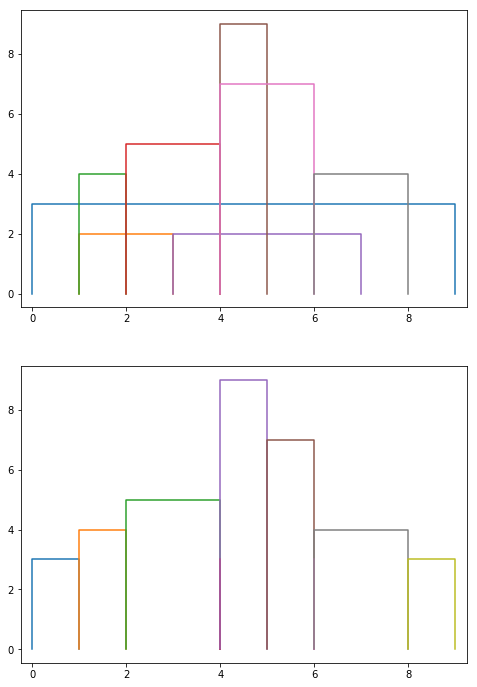

In [8]:
""" skyline-ish problem (silhouette of overlapping skyscrapers) """
class Rect:
    def __init__(self, LBound, RBound, height):
        self.L = LBound
        self.R = RBound
        self.H = height

    def __lt__(self, other):
        return self.L < other.L
    
    def __str__(self):
        return 'L:'+str(self.L)+' R:'+str(self.R)+' H:'+str(self.H)

def skyline_problem(sky):
    sky.sort()
    posA = 0
    posB = 1
    while posA < (len(sky)-1):
        if posB >= len(sky):
            posA += 1
            posB = posA + 1
            continue

        #if posB <= posA: posB = posA+1
        A = sky[posA]
        B = sky[posB]

        # case no overlap: { A } [ B ]
        #nothing to do, no simpification, move to next rect (next L is after A.R so nothing touches A)
        if A.R < B.L:
            posA += 1
            posB = posA+1

        # case touching overlap: { A | B ]
        elif A.R == B.L:
            #if same height and touching, they simplify into one rect
            if A.H == B.H:
                A.R = B.R      #set A rightBound to B righbound - now A covers both
                del sky[posB]
                ###posB = posA+1 do need to do this... maybe A expanded and overlapping B.L's? moving to next building might cover anyway
            #if touching, it's possible more rects also touch, advance only posB. if next B doesn't touch A, then we'll advance posA
            else:
                posB += 1    

        elif A.R >= B.R:
            #                           { A       }
            # case A complete surround: { A [ B ] }
            # B adds nothing, delete. keep checking A stuff. This also essentially advances posB (by deleting existing)
            if A.H >= B.H:
                del sky[posB]  #there still may be other rects overlapping A, so posA unchanged
            #                                          [ B ]
            # case A surrounds B but A is shorter: { A [ B ] }
            # Split A into part left of B and part right of B. there may be other overlapping buildings so insert right side appropriately
            else:
                C = Rect(B.R, A.R, A.H)       # new rect is portion of A that lies right of B
                bisectPos = my_bisect(sky, C) # C does not necessarily sort directly after B, check where it should go 
                sky.insert(bisectPos, C)      # inserts somewhere after B                       
                A.R = B.L                     # 'new' A now only exists to left of B
                posA += 1                     # new A is done processing, we move on to B
                posB = posA+1

        #standard, partial overlap : { A [ } B ]
        else:
            #same height: merge B into A. Delete B. we essentially advance posB
            if A.H == B.H:
                A.R = B.R
                del sky[posB]
            #A taller. cut the portion of B hidden by A. go to next B - A may still touch another builing edge at A.R
            elif A.H > B.H:
                B.L = A.R
                posB+=1
            #B taller. cut portion of A hidden by B and go to next A. (if there was another rect aligned with B we should still address it when we advance off A)
            elif A.H < B.H:
                A.R = B.L
                posA += 1
                posB = posA+1
    
    return sky
            

s = [
    Rect(0, 9, 3),
    Rect(1, 3, 2),
    Rect(1, 2, 4),
    Rect(2, 4, 5),
    Rect(3, 7, 2),
    Rect(4, 5, 9),
    Rect(4, 6, 7),
    Rect(6, 8, 4),
]
origS = deepcopy(s)

s2 = skyline_problem(s)

#fig = plt.figure(figsize=(12,4))
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(211)
for r in origS:
    ptX = [r.L, r.L, r.R, r.R]
    ptY = [0, r.H, r.H, 0]
    ax.plot(ptX, ptY)
    
ax.set_xlim([-0.25, 9.25])    

    
ax2 = fig.add_subplot(212)
for r in s2:
    ptX = [r.L, r.L, r.R, r.R]
    ptY = [0, r.H, r.H, 0]
    ax2.plot(ptX, ptY)
    
ax2.set_xlim([-0.25, 9.25])

plt.show()

In [ ]:
""" Polynomial representation """

class PolyN:
    def __init__(self, _coeff, _power):
        self.coeff = _coeff
        self.power = _power
        

In [182]:
""" greatest common denominator - recursive and not """
def gcd(m, n):
    #print(m,n)
    if n == 0:
        return m
    return gcd(n, m%n)

def gcd2(m,n):
    if m<n: m,n=n,m
    while m%n != 0:
        n, m = m%n, n
        #print(m,n)

    return n

print( gcd2(2431,30030) )
print( gcd(2431,30030) )

143
143


In [185]:
def hanoi(N, d):
    if N == 0:
        return
    hanoi(N-1, -d)
    print('shift',N, d)
    hanoi(N-1, -d)

In [209]:
def rule(L, R, H):
    ary = [0]*(R-L+1)
    ruleHelp(L,R,H,ary)
    return ary

def ruleHelp(L, R, H, ary):
    if H == 0:
        return
    M = (L+R)//2
    ruleHelp(L,M,H-1,ary)
    #print('mark', M, H)
    ary[M] = H
    ruleHelp(M,R,H-1,ary)


In [210]:
startRuler(0,16,4)

[0, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 0]

In [10]:
""" Knapsack """
def knapsack(knapCap, itemList, knownKnaps):    
    if knapCap in knownKnaps:
        return knownKnaps[knapCap][0]
    
    maxVal = 0
    maxIdx = None
    bestRemain = 0
    for idx,item in enumerate(itemList):
        spaceRemain = knapCap - item[0]
        if spaceRemain < 0:
            continue
        newVal = knapsack(spaceRemain, itemList, knownKnaps) + item[1]
        if newVal > maxVal:
            maxVal = newVal
            maxIdx = idx
            bestRemain = spaceRemain
    
    if bestRemain in knownKnaps and maxIdx is not None:
        oldList = knownKnaps[bestRemain][1]
        newList = [x for x in oldList]  #deepcopy previous list
        newList.append(maxIdx)
    elif maxIdx is not None:
        newList = [maxIdx]
    else:
        newList = []
    knownKnaps[knapCap] = (maxVal, newList)
    return maxVal

#knapItems[itemNo] = (size, value)
knapItems = [ (63, 57), (37, 27), (19, 11) ]
knapCap = 112
knapSolu = {}
print(knapsack(knapCap, knapItems, knapSolu))
#print(knapSolu)

84


In [327]:
""" recursion - binay search - find closest value in sorted ary """
def find_sorted_closest(ary, tgt, L, R):
    #print(c, L, R)
    if R-L == 1:
        return L if abs(tgt-L)<abs(tgt-R) else R

    guessIdx = int( (L+R)//2 )
    if tgt > ary[guessIdx]:
        return find_sorted_closest(ary, tgt, guessIdx, R)
    elif tgt < ary[guessIdx]:
        return find_sorted_closest(ary, tgt, L, guessIdx)
    #if value at guessIdx exactly matches our target then we're done
    else:
        print('exact')
        return guessIdx

N = 33
ary = [random() for x in range(N)]
ary.sort()
tgt = 1.1
find_sorted_closest(ary, tgt, 0, len(ary))

32

In [56]:
# quick
# m e a n

def reverse_words(wordStr):
    if type(wordStr) == str:
        wordStr = list(wordStr)
        #print('converting', wordStr)

    wordNo = 0
    pos = 0
    strLng = len(wordStr)
    if strLng == 0:
        return
    
    #loop over words
    while pos < strLng:

        #loop over characters in word
        while pos < strLng and wordStr[pos]==' ':
            pos+=1
        wordStart = pos
        while pos < strLng and not wordStr[pos]==' ':
            pos += 1
        
        wordEnd = pos-1  #pos of last letter in word
        print(pos, strLng, wordStart, wordEnd, wordStr[wordStart:wordEnd+1])
        for letterNo in range(wordStart, (wordStart+wordEnd+1)//2):
            print('swapping', letterNo, wordStart+wordEnd-letterNo, wordStr[letterNo], wordStr[wordStart+wordEnd-letterNo])
            wordStr[letterNo], wordStr[wordStart+wordEnd-letterNo] = wordStr[wordStart+wordEnd-letterNo], wordStr[letterNo]        
        wordNo += 1
        
        
#    
#    return wordStr

def reverse_list(wordStr):
    strLng = len(wordStr)
    for letterNo in range(strLng//2):
        wordStr[letterNo],wordStr[strLng-letterNo-1] = wordStr[strLng-letterNo-1],wordStr[letterNo]

testStr = list('   the    quick brown fox jumped over the lazy dog  .')
reverse_words(testStr)
reverse_list(testStr)
print(testStr)

6 53 3 5 ['t', 'h', 'e']
swapping 3 5 t e
15 53 10 14 ['q', 'u', 'i', 'c', 'k']
swapping 10 14 q k
swapping 11 13 u c
21 53 16 20 ['b', 'r', 'o', 'w', 'n']
swapping 16 20 b n
swapping 17 19 r w
25 53 22 24 ['f', 'o', 'x']
swapping 22 24 f x
32 53 26 31 ['j', 'u', 'm', 'p', 'e', 'd']
swapping 26 31 j d
swapping 27 30 u e
swapping 28 29 m p
37 53 33 36 ['o', 'v', 'e', 'r']
swapping 33 36 o r
swapping 34 35 v e
41 53 38 40 ['t', 'h', 'e']
swapping 38 40 t e
46 53 42 45 ['l', 'a', 'z', 'y']
swapping 42 45 l y
swapping 43 44 a z
50 53 47 49 ['d', 'o', 'g']
swapping 47 49 d g
53 53 52 52 ['.']
['.', ' ', ' ', 'd', 'o', 'g', ' ', 'l', 'a', 'z', 'y', ' ', 't', 'h', 'e', ' ', 'o', 'v', 'e', 'r', ' ', 'j', 'u', 'm', 'p', 'e', 'd', ' ', 'f', 'o', 'x', ' ', 'b', 'r', 'o', 'w', 'n', ' ', 'q', 'u', 'i', 'c', 'k', ' ', ' ', ' ', ' ', 't', 'h', 'e', ' ', ' ', ' ']


In [375]:
""" quicksort algorithm """           
def quick_sort_help(ary, LIdx, RIdx, recur, compareFunc):
    #simplify 2 items: swap if out of order else done
    if RIdx-LIdx < 2:
        if RIdx-LIdx == 1:
            if ary[LIdx] > ary[RIdx]:
                ary[LIdx], ary[RIdx] = ary[RIdx], ary[LIdx]
            #print(recur,'<<two>>  ['+str(LIdx)+','+str(RIdx)+']', ary[LIdx:RIdx+1])
        return
    
    #print(recur,'['+str(LIdx)+','+str(RIdx)+']')
    #print(recur,'['+str(LIdx)+','+str(RIdx)+']', ary[LIdx:RIdx+1])
    
    #pick a 'random' pivot. guaranteed to change each iteration if the subset doesn't change
    pivotIdx = LIdx+(recur%(RIdx-LIdx))
    pivotVal = ary[pivotIdx]    
    leftElem = LIdx
    rightElem = RIdx
    while leftElem < rightElem:
        while not (ary[leftElem]>pivotVal) if compareFunc is None else compareFunc(ary[leftElem], pivotVal):    
            leftElem += 1
            if rightElem == leftElem:
                break

        while (ary[rightElem]>pivotVal) if compareFunc is None else compareFunc(ary[rightElem], pivotVal):
            rightElem -= 1
            if rightElem == leftElem:
                break

        #print(ary[LIdx:RIdx+1], '  ', leftElem, '<>', rightElem, '('+str(pivotVal)+')')
        #if we scanned thru remainder of right side and hit the 
        if leftElem < rightElem:
            ary[leftElem], ary[rightElem] = ary[rightElem], ary[leftElem]
            if rightElem == pivotIdx:
                pivotIdx = leftElem
            leftElem += 1
            rightElem -= 1
   
    
    #print(ary[LIdx:RIdx+1], 'L:', leftElem, '  R:',rightElem, '  P:', pivotIdx)
    #pivot will always be in the lower list now (> goes high). We also know it belongs exactly at the end of the low list
    # so swap with current last item, and we don't need to process next iter - it's in its final position
    #print(recur,'['+str(LIdx)+','+str(RIdx)+']', ' low:',ary[LIdx:pivotIdx], '    pivot:('+str(pivotIdx)+','+str(pivotVal)+')', '   high:', ary[pivotIdx+1:RIdx+1])
    
    if ary[leftElem] > pivotVal:
        leftElem -= 1
    
    ary[leftElem], ary[pivotIdx] = ary[pivotIdx], ary[leftElem]
    pivotIdx = leftElem
    
    #print(recur,'['+str(LIdx)+','+str(RIdx)+']', ' low:',ary[LIdx:pivotIdx], '    pivot:('+str(pivotIdx)+','+str(pivotVal)+')', '   high:', ary[pivotIdx+1:RIdx+1])
    if (pivotIdx-1)>LIdx: quick_sort_help(ary, LIdx, pivotIdx-1, recur+1, compareFunc)  #low set excluding pivot
    if RIdx>(pivotIdx+1): quick_sort_help(ary, pivotIdx+1, RIdx, recur+1, compareFunc)  #high set

def quick_sort(ary, compareFunc=None):
    quick_sort_help(ary, 0, len(ary)-1, 0, compareFunc)

N = 111111
ary = [round_sig(random(),22) for idx in range(N)]

newAry1 = [x for x in ary]
t0 = time()
newAry1.sort()
print(time()-t0)

newAry2 = [x for x in ary]
t0 = time()
#quick_sort(newAry2)  #lambda x,y: x[0]>y[0] or ( x[0]==y[0] and x[1]>y[1])
print(time()-t0)

newAry3 = [x for x in ary]
t0 = time()
quick_sort_stack(newAry3)
print(time()-t0)

newAry4 = [x for x in ary]
t0 = time()
#srtc.quick_sort(newAry4)
print(time()-t0)

newAry5 = [x for x in ary]
t0 = time()
#insertion_sort(newAry5)
print(time()-t0)

newAry6 = [x for x in ary]
t0 = time()
optimized_quick_sort(newAry5)
print(time()-t0)

def checksum(ary):
    s = 0; N = len(ary)
    for idx in range(0,N,2): s += ary[idx]
    for idx in range(1,N,2): s -= ary[idx]
    return round_sig(s)

print(checksum(newAry1), checksum(newAry2), checksum(newAry3), checksum(newAry4), checksum(newAry5), checksum(newAry5) )

#print(newAry1)
#print(newAry2)
#print( [(x[0],x[1]) for x in newAry1])

0.027764081954956055
0.0
0.669780969619751
0.0
0.0
0.57004714012146
0.501 -115.0 0.501 -115.0 0.501 0.501


In [1]:
def quick_order(ary, kthSmallest):
    return quick_order_help(ary, kthSmallest, 0, len(ary)-1, 0)

def quick_order_help(ary, kthSmallest, LIdx, RIdx, recur):
    if RIdx==LIdx:
        return ary[LIdx], LIdx
    
    #pick a 'random' pivot. guaranteed to change each iteration if the subset doesn't change
    pivotIdx = LIdx+(recur%(RIdx-LIdx))
    pivotVal = ary[pivotIdx]    
    postPivotIdx = RIdx
    elemNo = LIdx
    while elemNo < postPivotIdx:
        elemVal = ary[elemNo]
        if elemVal > pivotVal:
            ary[elemNo], ary[postPivotIdx] = ary[postPivotIdx], ary[elemNo]
            #we know our pivot belongs at the end of the low list. we'll keep track of it and move it there at the end. We can also skip checking the next number i think
            if postPivotIdx == pivotIdx:
                pivotIdx = elemNo
                if elemNo < postPivotIdx - 1:
                    elemNo += 1  #safe? check is postPivot == elemNo+1 here?
            postPivotIdx -= 1 #prepare for the next swap to the high side
        else:
            #element belongs on low side, and it's already there, go to next
            elemNo += 1

    # the last element doesn't need to move. We just need to put the divide in the right place
    if ary[elemNo] > pivotVal:
        elemNo -= 1
    
    #pivot will always be in the lower list now (> goes high). We also know it belongs exactly at the end of the low list
    # so swap with current last item, and we don't need to process next iter - it's in its final position
    ary[elemNo], ary[pivotIdx] = ary[pivotIdx], ary[elemNo]
    
    print(recur,'['+str(LIdx)+','+str(RIdx)+']', ' low:',ary[LIdx:elemNo], '    pivot:(['+str(elemNo)+']='+str(pivotVal)+')', '   high:', ary[elemNo+1:RIdx+1])
    if kthSmallest == elemNo:
        return pivotVal, elemNo
    elif kthSmallest < elemNo:
        return quick_order_help(ary, kthSmallest, LIdx, elemNo-1, recur+1)  #low set excluding pivot
    else:
        return quick_order_help(ary, kthSmallest, elemNo+1, RIdx, recur+1)  #high set

In [2]:
medAry = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 123, 12458, 348, 124, 95, 34]
quick_order(medAry,len(medAry)//2)

0 [0,15]  low: [0]     pivot:([1]=1)    high: [4, 5, 6, 7, 8, 9, 3, 123, 12458, 348, 124, 95, 34, 2]
1 [2,15]  low: [4, 3, 2]     pivot:([5]=5)    high: [9, 8, 123, 12458, 348, 124, 95, 34, 7, 6]
2 [6,15]  low: [9, 8, 95, 6, 7, 34]     pivot:([12]=123)    high: [124, 348, 12458]
3 [6,11]  low: []     pivot:([6]=6)    high: [95, 8, 7, 34, 9]
4 [7,11]  low: [9, 8, 7, 34]     pivot:([11]=95)    high: []
5 [7,10]  low: []     pivot:([7]=7)    high: [8, 34, 9]
6 [8,10]  low: []     pivot:([8]=8)    high: [9, 34]


(8, 8)

In [184]:
""" quicksort algorithm using stack/queue instead of recursion """
class LinkStack:
    class StackNode:
        def __init__(self, _val=None, _back=None):
            self.val = _val
            self.back = _back

    def __init__(self):
        self.prev = None

    def push(self, _item):
        self.prev = self.StackNode(_item, self.prev)
        
    def pop(self):
        nd = self.prev
        self.prev = nd.back
        return nd.val
    
    def is_empty(self):
        return (self.prev == None)
    
def quick_sort_stack(ary):
    workStack = LinkStack()
    workStack.push( (0, len(ary)-1, 0) )
    #work = [(0, len(ary)-1, 0)]
        
    while not workStack.is_empty():
    #while len(work)>0:
        stepInfo = workStack.pop()
        #stepInfo = work[-1]
        LIdx = stepInfo[0]
        RIdx = stepInfo[1]
        depth = stepInfo[2]
        #del work[-1]
        
        #simplify 2 items: swap if out of order else done
        if RIdx-LIdx < 2:
            if RIdx-LIdx == 1:
                if ary[LIdx] > ary[RIdx]:
                    ary[LIdx], ary[RIdx] = ary[RIdx], ary[LIdx]
                
            continue

        #pick a 'random' pivot. guaranteed to change each iteration if the subset doesn't change
        pivotIdx = LIdx+(depth%(RIdx-LIdx))
        pivotVal = ary[pivotIdx]    
        postPivotIdx = RIdx
        elemNo = LIdx
        while elemNo < postPivotIdx:
            if ary[elemNo] > pivotVal:
                ary[elemNo], ary[postPivotIdx] = ary[postPivotIdx], ary[elemNo]
                #we know our pivot belongs at the end of the low list. we'll keep track of it and move it there at the end. We can also skip checking the next number i think
                if postPivotIdx == pivotIdx:
                    pivotIdx = elemNo
                    elemNo += 1  #safe? check is postPivot == elemNo+1 here?
                postPivotIdx -= 1    #prepare for the next swap to the high side
            else:
                elemNo += 1          #element belongs on low side, and it's already there, go to next

        # the last element doesn't need to move. We just need to put the divide in the right place
        if ary[elemNo] > pivotVal:
            elemNo -= 1

        #pivot will always be in the lower list now (> goes high). We also know it belongs exactly at the end of the low list
        # so swap with current last item, and we don't need to process next iter - it's in its final position
        ary[elemNo], ary[pivotIdx] = ary[pivotIdx], ary[elemNo]

        if (elemNo-1)>LIdx:
            workStack.push( (LIdx, elemNo-1, depth+1) )
            #work.append( (LIdx, elemNo-1, depth+1) )
        if RIdx>(elemNo+1):
            workStack.push( (elemNo+1, RIdx, depth+1) )
            #work.append( (elemNo+1, RIdx, depth+1) )

In [372]:
def optimized_quick_sort(ary):
    optimized_quick_sort_help(ary, 0, len(ary)-1)
    insert_sort_finish(ary, 0, len(ary)-1)

def optimized_quick_sort_help(ary, LIdx, RIdx):
    pivotIdx = LIdx
    pivotVal = ary[pivotIdx]    
    leftElem = LIdx + 1 #assuming pivotIdx == 0
    rightElem = RIdx
    while leftElem < rightElem:
        while ary[leftElem]<pivotVal:
            leftElem += 1
            if rightElem == leftElem: break

        while ary[rightElem]>pivotVal:
            rightElem -= 1
            if rightElem == leftElem: break

        if leftElem < rightElem:
            ary[leftElem], ary[rightElem] = ary[rightElem], ary[leftElem]
            leftElem += 1
            rightElem -= 1
    
    if ary[leftElem]>pivotVal:
        leftElem -= 1
    
    ary[leftElem], ary[pivotIdx] = ary[pivotIdx], ary[leftElem]
    pivotIdx = leftElem
    
    # process the shorter list first to minimize stack volume
    # Less than M=10 elems left is finished with insertion sort (faster for small arrays)
    # <2 elems left is already sorted
    leftCount = pivotIdx-1 - LIdx
    rightCount = RIdx - pivotIdx-1
    if leftCount<rightCount:
        # testing... faster to finish small sublists with insertion sort,
        #which we effectvely do by quiting when the sublist is small and running insertion sort on all of ary at end
        if leftCount>16: optimized_quick_sort_help(ary, LIdx, pivotIdx-1)
        if rightCount>16: optimized_quick_sort_help(ary, pivotIdx+1, RIdx)
    else:
        if rightCount>16: optimized_quick_sort_help(ary, pivotIdx+1, RIdx)
        if leftCount>16: optimized_quick_sort_help(ary, LIdx, pivotIdx-1)

def insert_sort_finish(ary, LIdx, RIdx):
    for sortFront in range(LIdx+1,RIdx+1):
        v = ary[sortFront]  #value of next item just right of sorted portion [0, sortFront)
        swapPt = sortFront
        while swapPt > 0 and v < ary[swapPt-1]:
            ary[swapPt] = ary[swapPt-1]
            swapPt -= 1

        if swapPt != sortFront: ary[swapPt] = v

In [461]:
def merge_sort_ab(aAry):
    bAry = aAry[:]
    merge_sort_help_ab(aAry, bAry, 0, len(aAry)-1, 0)
    print(aAry)
    print(bAry)
    
def merge_sort_help_ab(aAry, bAry, LIdx, RIdx, depth):
    if RIdx-LIdx<5:
        insert_sort_finish(aAry, LIdx, RIdx)
        return

    MIdx = int((RIdx + LIdx)//2)
    merge_sort_help_ab(bAry, aAry, LIdx, MIdx, depth+1)
    merge_sort_help_ab(bAry, aAry, MIdx+1, RIdx, depth+1)
    merge_combine(aAry, bAry, LIdx, RIdx, MIdx)

#call with 1 or 2 elements let in inpAry. Copy/sort over to outAry (instead of calling merge_combine - overkill)
def merge_finish(ary, LEnd, REnd):
    if REnd-LEnd == 1:
        if ary[LEnd] > ary[REnd]:
            ary[LEnd], ary[REnd] = ary[REnd], ary[LEnd]

def merge_combine(inpAry, outAry, LEnd, REnd, MIdx):
    CIdx = LEnd
    LIdx = LEnd
    RIdx = MIdx+1
    LVal = inpAry[LIdx]
    RVal = inpAry[RIdx]
    
    
    while CIdx <= REnd:  #shouldn't need the while condition - we'll always end by exhausting one of the sublists and breaking below
        if LVal > RVal:
            outAry[CIdx] = RVal
            RIdx += 1
            #if last this was last element in R sublist, add remainder of L and break
            if RIdx > REnd:
                outAry[CIdx+1] = LVal
                for p in range(CIdx+2,REnd+1):
                    LIdx+=1
                    outAry[p] = inpAry[LIdx]
                break
            else:    
                RVal = inpAry[RIdx]
        
        #L_Val <= R_Val - I think <= like this ensures stability (as opposed to checking LVal<RVal above)
        else:
            outAry[CIdx] = LVal
            LIdx += 1
            #if last this was last element in R sublist, add remainder of L and break
            if LIdx > MIdx:
                outAry[CIdx+1] = RVal
                for p in range(CIdx+2,REnd+1):
                    RIdx+=1
                    outAry[p] = inpAry[RIdx]
                break
            else:    
                LVal = inpAry[LIdx]
        
        CIdx += 1    

tAry = [9, 2, 4, 7, 1, 3, 8, 6 ]
xAry = tAry[:]
merge_sort_ab(tAry)
print(tAry)
#print(fAry)

[9, 2, 4, 7, 1, 3, 8, 6]
[1, 3, 8, 6, 9, 2, 4, 7]
[9, 2, 4, 7, 1, 3, 8, 6]


In [474]:
import inspect
inspect.getsourcefile(list.sort)

TypeError: <method 'sort' of 'list' objects> is not a module, class, method, function, traceback, frame, or code object

In [ ]:
def merge_sort(ary):
    workStack.add( (0, len(ary)-1) )
    while not workStack.is_empty():
        workInfo = workStack.pop()
        LEnd = workInfo[0]
        REnd = workInfo[1]
        MIdx = int((LEnd + REnd)//2)
        
        if MIdx-LEnd < 2:
            merge_finish(ary, LEnd, MIdx)
        else:
            merge_sort_help(oAry, cAry, LIdx, MIdx, depth+1)
        
        if RIdx-(MIdx+1) < 2:
            merge_finish(oAry, oAry, MIdx+1, RIdx)
        else:
            merge_sort_help(oAry, cAry, MIdx+1, RIdx, depth+1)

        if cAry[LIdx] is None:
            merge_combine(oAry, cAry, LIdx, RIdx, MIdx)
            oAry[LIdx] = None
        else:
            merge_combine(cAry, oAry, LIdx, RIdx, MIdx)
            cAry[LIdx] = None
    

class MergeNode:
    def __init__(self,val,prev=None):
        self.val = val
        self.prev = prev
class MergeStack:
    def __init__(self):
        self.tail = None
    def add(self, val):
        newNode = MergeNode(val, self.tail)
        self.tail = newNode
    def pop(self):
        node = self.tail
        self.tail = node.prev
        return node.val
    def is_empty(self):
        return (self.tail == None)

#call with 1 or 2 elements let in inpAry. Copy/sort over to outAry (instead of calling merge_combine - overkill)
def merge_finish(ary, LEnd, REnd):
    if REnd-LEnd == 1:
        if ary[LEnd] > ary[REnd]:
            ary[LEnd], ary[REnd] = ary[REnd], ary[LEnd]
    

def merge_combine(inpAry, outAry, LEnd, REnd, MIdx):
    CIdx = LEnd
    LIdx = LEnd
    RIdx = MIdx+1
    LVal = inpAry[LIdx]
    RVal = inpAry[RIdx]
    
    
    while CIdx <= REnd:  #shouldn't need the while condition - we'll always end by exhausting one of the sublists and breaking below
        if LVal > RVal:
            outAry[CIdx] = RVal
            RIdx += 1
            #if last this was last element in R sublist, add remainder of L and break
            if RIdx > REnd:
                outAry[CIdx+1] = LVal
                for p in range(CIdx+2,REnd+1):
                    LIdx+=1
                    outAry[p] = inpAry[LIdx]
                break
            else:    
                RVal = inpAry[RIdx]
        
        #L_Val <= R_Val - I think <= like this ensures stability (as opposed to checking LVal<RVal above)
        else:
            outAry[CIdx] = LVal
            LIdx += 1
            #if last this was last element in R sublist, add remainder of L and break
            if LIdx > MIdx:
                outAry[CIdx+1] = RVal
                for p in range(CIdx+2,REnd+1):
                    RIdx+=1
                    outAry[p] = inpAry[RIdx]
                break
            else:    
                LVal = inpAry[LIdx]
        
        CIdx += 1    

tAry = [9, 2, 4, 7, 1, 3, 8, 6 ]
xAry = tAry[:]
fAry = tAry[:]
merge_sort(tAry, fAry)
print(tAry)
#print(fAry)

In [382]:
bAry = [1, 2, 3]
gAry = [0]*3
gAry[0:3] = bAry[0:3]

gAry[1] = 9
print(bAry)

[1, 2, 3]


In [197]:
def insertion_sort(ary):
    N = len(ary)
    for sortFront in range(1,N):
        for swapPt in range(sortFront,0,-1):
            if ary[swapPt] < ary[swapPt-1]:
                ary[swapPt], ary[swapPt-1] = ary[swapPt-1], ary[swapPt]

tAry = [randint(0,99) for x in range(25)]
insertion_sort(tAry)
print(tAry)

def selection_sort(ary):
    N = len(ary)
    for sortFront in range(N-1):
        bestIdx = sortFront
        bestVal = ary[sortFront]
        for testIdx in range(sortFront+1,N):
            val = ary[testIdx]
            if val < bestVal:
                bestVal = val
                bestIdx = testIdx
        
        ary[sortFront], ary[bestIdx] = ary[bestIdx], ary[sortFront]

tAry = [randint(0,99) for x in range(25)]
selection_sort(tAry)
print(tAry)

[0, 9, 11, 20, 31, 38, 40, 41, 44, 47, 48, 52, 54, 54, 57, 57, 61, 61, 70, 76, 76, 84, 90, 95, 98]
[2, 13, 16, 18, 24, 25, 25, 27, 37, 43, 43, 46, 49, 53, 55, 62, 67, 69, 71, 74, 75, 80, 86, 90, 96]


In [305]:
#oAry = [randint(0,99) for x in range(10)]
ary = [x for x in oAry]
ary = list(range(10,0,-1))
#ary = list(range(10))
#ary=[]
N = len(ary)
for sortFront in range(1,N):
    print(ary[0:sortFront], '|', ary[sortFront:])
    v = ary[sortFront]
    swapPt = sortFront
    print('ary['+str(swapPt)+']', '=', 'v', '=', v)
    while swapPt > 0 and v < ary[swapPt-1]:
        print('v < ', 'ary['+str(swapPt-1)+']='+str(ary[swapPt-1]), ' - ','ary['+str(swapPt)+']='+str(ary[swapPt-1]) )
        ary[swapPt] = ary[swapPt-1]
        swapPt -= 1

    if swapPt != sortFront:
        print('ary['+str(swapPt)+'] = v = '+str(v))
        ary[swapPt] = v

print(ary, '  C:', compareCount, '  <>:',swapCount)

[10] | [9, 8, 7, 6, 5, 4, 3, 2, 1]
ary[1] = v = 9
v <  ary[0]=10  -  ary[1]=10
ary[0] = v = 9
[9, 10] | [8, 7, 6, 5, 4, 3, 2, 1]
ary[2] = v = 8
v <  ary[1]=10  -  ary[2]=10
v <  ary[0]=9  -  ary[1]=9
ary[0] = v = 8
[8, 9, 10] | [7, 6, 5, 4, 3, 2, 1]
ary[3] = v = 7
v <  ary[2]=10  -  ary[3]=10
v <  ary[1]=9  -  ary[2]=9
v <  ary[0]=8  -  ary[1]=8
ary[0] = v = 7
[7, 8, 9, 10] | [6, 5, 4, 3, 2, 1]
ary[4] = v = 6
v <  ary[3]=10  -  ary[4]=10
v <  ary[2]=9  -  ary[3]=9
v <  ary[1]=8  -  ary[2]=8
v <  ary[0]=7  -  ary[1]=7
ary[0] = v = 6
[6, 7, 8, 9, 10] | [5, 4, 3, 2, 1]
ary[5] = v = 5
v <  ary[4]=10  -  ary[5]=10
v <  ary[3]=9  -  ary[4]=9
v <  ary[2]=8  -  ary[3]=8
v <  ary[1]=7  -  ary[2]=7
v <  ary[0]=6  -  ary[1]=6
ary[0] = v = 5
[5, 6, 7, 8, 9, 10] | [4, 3, 2, 1]
ary[6] = v = 4
v <  ary[5]=10  -  ary[6]=10
v <  ary[4]=9  -  ary[5]=9
v <  ary[3]=8  -  ary[4]=8
v <  ary[2]=7  -  ary[3]=7
v <  ary[1]=6  -  ary[2]=6
v <  ary[0]=5  -  ary[1]=5
ary[0] = v = 4
[4, 5, 6, 7, 8, 9, 10] | [3, 2,

In [302]:
#oAry = [randint(0,99) for x in range(10)]
ary = [x for x in oAry]
ary = list(range(10,0,-1))
ary = list(range(10))
ary=[]
N = len(ary)
swapCount = 0
compareCount = 0
for sortFront in range(1,N):
    print(ary[0:sortFront], '|', ary[sortFront:])
    v = ary[sortFront] 
    print('ary['+str(sortFront)+']', '=', 'v', '=', v)
    for swapPt in range(sortFront,0,-1):
        compareCount += 1
        if v < ary[swapPt-1]:
            print('v < ', 'ary['+str(swapPt-1)+']='+str(ary[swapPt-1]), ' - ','ary['+str(swapPt)+']='+str(ary[swapPt-1]) )
            swapCount += .5
            ary[swapPt] = ary[swapPt-1]
        # everything up to sort front is in order, so if our swap-item is >=ary[j], it's also >= ary[0:j]
        else:
            print('v >> ary['+str(swapPt-1)+']='+str(ary[swapPt-1]) )
            swapPt += 1
            break
            
    if swapPt-1 != sortFront:
        print('ary['+str(swapPt)+'] = v = '+str(v))
        ary[swapPt-1] = v

print(ary, '  C:', compareCount, '  <>:',swapCount)

[]   C: 0   <>: 0


In [278]:
oAry = [randint(0,99) for x in range(10)]
ary = [x for x in oAry]
#ary = list(range(10,0,-1))
N = len(ary)
swapCount = 0
compareCount = 0
for sortFront in range(1,N):
    print(ary[0:sortFront], '|', ary[sortFront+1:])
    for swapPt in range(sortFront,0,-1):
        compareCount += 1
        if ary[swapPt] < ary[swapPt-1]:
            swapCount += 1
            ary[swapPt-1], ary[swapPt] = ary[swapPt], ary[swapPt-1]
        # everything up to sort front is in order, so if our swap-item is >=ary[j], it's also >= ary[0:j]
        else:
            break
print(ary, '  C:', compareCount, '  <>:',swapCount)

[11] | [74, 51, 8, 24, 41, 5, 18, 31]
[11, 88] | [51, 8, 24, 41, 5, 18, 31]
[11, 74, 88] | [8, 24, 41, 5, 18, 31]
[11, 51, 74, 88] | [24, 41, 5, 18, 31]
[8, 11, 51, 74, 88] | [41, 5, 18, 31]
[8, 11, 24, 51, 74, 88] | [5, 18, 31]
[8, 11, 24, 41, 51, 74, 88] | [18, 31]
[5, 8, 11, 24, 41, 51, 74, 88] | [31]
[5, 8, 11, 18, 24, 41, 51, 74, 88] | []
[5, 8, 11, 18, 24, 31, 41, 51, 74, 88]   C: 36   <>: 29


In [279]:
ary = [x for x in oAry]
#ary = list(range(10,0,-1))
N = len(ary)
swapCount = 0
compareCount = 0
for sortFront in range(1,N):
    print(ary[0:sortFront], '|', ary[sortFront:])
    for swapPt in range(sortFront,0,-1):
        compareCount += 1
        if ary[swapPt] < ary[swapPt-1]:
            swapCount += 1
            ary[swapPt-1], ary[swapPt] = ary[swapPt], ary[swapPt-1]
print(ary, '  C:', compareCount, '  <>:',swapCount)

[11] | [88, 74, 51, 8, 24, 41, 5, 18, 31]
[11, 88] | [74, 51, 8, 24, 41, 5, 18, 31]
[11, 74, 88] | [51, 8, 24, 41, 5, 18, 31]
[11, 51, 74, 88] | [8, 24, 41, 5, 18, 31]
[8, 11, 51, 74, 88] | [24, 41, 5, 18, 31]
[8, 11, 24, 51, 74, 88] | [41, 5, 18, 31]
[8, 11, 24, 41, 51, 74, 88] | [5, 18, 31]
[5, 8, 11, 24, 41, 51, 74, 88] | [18, 31]
[5, 8, 11, 18, 24, 41, 51, 74, 88] | [31]
[5, 8, 11, 18, 24, 31, 41, 51, 74, 88]   C: 45   <>: 29


In [345]:
def insertion_sort(ary):
	insertion_sort_help(ary, 0, len(ary)-1)

def insertion_sort_help(ary, LIdx, RIdx):
    for sortFront in range(LIdx+1,RIdx+1):
        v = ary[sortFront]  #value of next item just right of sorted portion [0, sortFront)
        swapPt = sortFront

        #find first item <= v. shift everything one right/up along the way. or reach end of ary
        while swapPt > 0 and v < ary[swapPt-1]:
            ary[swapPt] = ary[swapPt-1]
            swapPt -= 1

        # move v in front of all elements larger than it (we already moved those +1 to right)
        if swapPt != sortFront:  #if v not < anything to left, it's already where it belongs now
            ary[swapPt] = v



def shell_sort_help(ary, LIdx, RIdx):
    outerH = 0
    #print('h:', h)
    while outerH <= (RIdx-1)/9:
        #print('h:', h)
        outerH = 3*outerH + 1
        h = outerH
        while h>0:
            print('h:', h)
            for sortFront in range(LIdx+h,RIdx+1):
                v = ary[sortFront]  #value of next item just right of sorted portion [0, sortFront)
                swapPt = sortFront
                print(ary[0:sortFront], '|', ary[sortFront:])
                print('ary['+str(swapPt)+']', '=', 'v', '=', v)
                
                #find first item <= v. shift everything one right/up along the way. or reach end of ary
                while swapPt >= LIdx+h and v < ary[swapPt-h]:
                    print('v < ', 'ary['+str(swapPt-h)+']='+str(ary[swapPt-h]), ' - ','ary['+str(swapPt)+']='+str(ary[swapPt-h]) )
                    ary[swapPt] = ary[swapPt-h]
                    swapPt -= h

                # move v in front of all elements larger than it (we already moved those +1 to right)
                if swapPt != sortFront:  #if v not < anything to left, it's already where it belongs now
                    print('ary['+str(swapPt)+'] = v = '+str(v))
                    ary[swapPt] = v
            h = int((h-1)/3)
        #outerH = 3*outerH + 1

ary = [x for x in oAry] 
ary = [randint(0,99) for x in range(100)]
#print(ary)
shell_sort_help(ary, 0, len(ary)-1)
print(ary)

h: 1
[79] | [67, 71, 50, 71, 60, 29, 56, 38, 4, 33, 38, 17, 59, 16, 37, 46, 93, 59, 46, 58, 94, 97, 37, 15, 17, 45, 64, 56, 62, 81, 80, 47, 59, 3, 73, 18, 53, 56, 57, 0, 31, 2, 81, 6, 6, 86, 2, 41, 20, 57, 25, 54, 45, 25, 17, 26, 70, 12, 36, 55, 82, 31, 70, 7, 32, 33, 89, 93, 73, 36, 93, 81, 81, 93, 17, 35, 70, 49, 74, 46, 34, 8, 54, 74, 4, 61, 45, 90, 71, 24, 17, 37, 11, 18, 70, 0, 64, 55, 6]
ary[1] = v = 67
v <  ary[0]=79  -  ary[1]=79
ary[0] = v = 67
[67, 79] | [71, 50, 71, 60, 29, 56, 38, 4, 33, 38, 17, 59, 16, 37, 46, 93, 59, 46, 58, 94, 97, 37, 15, 17, 45, 64, 56, 62, 81, 80, 47, 59, 3, 73, 18, 53, 56, 57, 0, 31, 2, 81, 6, 6, 86, 2, 41, 20, 57, 25, 54, 45, 25, 17, 26, 70, 12, 36, 55, 82, 31, 70, 7, 32, 33, 89, 93, 73, 36, 93, 81, 81, 93, 17, 35, 70, 49, 74, 46, 34, 8, 54, 74, 4, 61, 45, 90, 71, 24, 17, 37, 11, 18, 70, 0, 64, 55, 6]
ary[2] = v = 71
v <  ary[1]=79  -  ary[2]=79
ary[1] = v = 71
[67, 71, 79] | [50, 71, 60, 29, 56, 38, 4, 33, 38, 17, 59, 16, 37, 46, 93, 59, 46, 58, 94

In [332]:
(len(ary)-1-1)/9

0.8888888888888888

In [316]:
def h_iter(rMax):
    h = 0
    while h <= (rMax-1)/9:

        h = 3*h+1
        yield h

for h in h_iter(9999):
    print(h)

1
4
13
40
121
364
1093
3280


In [319]:
h = 0
RIdx = 999
while h=3*h+1 < (RIdx-1)/9:
    print(h)

SyntaxError: invalid syntax (<ipython-input-319-c22b41d9c779>, line 3)

In [492]:
def get_b_digit(num, digNo):
    return (num&(1<<digNo)) >> digNo

bStr = ''
num = 48
for bitNo in range(7,-1,-1):
    bStr += str(get_b_digit(num, bitNo))
print(bStr)
bin(num)

00110000


'0b110000'

In [552]:
""" neat sorting approach if we know there are many duplicates of a few keys """
""" even better if keys are 0-N, then we can use an array with key as index, else we need to map key to index ourself """
'''
this also demonstrates in-place reordering - moving elements to their known positions without allocating N extra space
we basically move an element into its postion, bumping the element there out, then move the bumped one, etc
until we end up back at the first element we positioned and fill it with the last element we bumped. (find a cycle and advance each element in the cycle by 1)
Then move to the next not-in-position element
'''
def get_item_key(item):
    return item[0]

def key_index_sort(ary):
    keyCounts = {}
    for item in ary:
        itemKey = get_item_key(item)       #define function to get key from element
        if itemKey in keyCounts:
            keyCounts[itemKey] += 1
        else:
            keyCounts[itemKey] = 1
    
    keyPos = {}
    keyEnd = {}
    pos = 0
    for key in sorted(keyCounts.keys()):
        keyPos[key] = pos
        pos += keyCounts[key]
        keyEnd[key] = pos
        
    for curKey in sorted(keyPos.keys()):
        kIdx = keyPos[curKey]
        kEndIdx = keyEnd[curKey]  # == keyPos[nextKey] ...

        #this is inplace and no auxillary space is allocated
        #move each element we encounter into correct place, newIdx
        #we bump the existing val @ newIdx, so we place that one, too, and cascade
        #if we stop cascading, emplace the item currently in the next idx reserved for our key
        while kIdx < kEndIdx:
            item = ary[kIdx]
            itemKey = get_item_key(item)
            changedOneItem = False
            
            #we stop cascading when we find an elemVal equal to current key. that elem fills the void where we started. (end of cycle)
            while not itemKey == curKey:
                changedOneItem = True
                itemCorrectPos = keyPos[itemKey]    #find where elem belongs
                bumpedItem = ary[itemCorrectPos]        #next val is the one we're about to bump
                bumpedKey = get_item_key(bumpedItem)
                #if item we're bumping has same key as item we're placing, bumped item is
                #already in correct place. bump next incorrect elem (and increment position for this key for each item we skipped)
                while get_item_key(bumpedItem) == itemKey:         
                    itemCorrectPos += 1
                    bumpedItem = ary[itemCorrectPos]

                ary[itemCorrectPos] = item          #our elem is now in its final resting place
                keyPos[itemKey] = itemCorrectPos+1  #increment pointer to next spot for elem's key val
                item = bumpedItem                   #bumped is just temp holder
                itemKey = get_item_key(item)
            
            #we know this elem's key matches current key
            if changedOneItem: ary[kIdx] = item
            kIdx += 1

ary = [(randint(5,9), chr(65+(idx%26))) for idx in range(100)]
key_index_sort(ary)
#ary

In [ ]:
binCounts = [keyPos[key] for key in sorted(keyPos)]
keys = [key for key in sorted(keyPos)]

"""  given ary with some unique keys, counts of occurrence of each key (binCounts) and a function to calculate the key from ary vals
     move the elements of ary to where they belong in ary based their keys
     this is alternative to creating an auxillary array, moving to aux in order, and copying back to ary. this requires no additional space (in place)
     assuming key_func is O(1), the function is O(N). I think we only visit each array value (calculate key) exactly once """
def in_place_placement(ary, binCounts, key_func=None, keys=[])
    nBins = len(binCounts)
    origEnds = binCounts[1:]+[nBins-1]
    for binNo in range(nBins):
        #for like radix sort, the 'keys' are the digit-values are the bin numbers
        #for generic key sort, keys could be anything. we look up correspondence: keys[binNo] = key represented in binCounts[binNo]
        curKey = keys[binNo] if keys is not [] else binNo
        kIdx = binCounts[binNo]
        kEndIdx = origEnds[binNo]

        #this is inplace and no auxillary space is allocated
        #move each element we encounter into correct place, newIdx
        #we bump the existing val @ newIdx, so we place that one, too, and cascade
        #if we stop cascading, emplace the item currently in the next idx reserved for our key
        while kIdx < kEndIdx:
            item = ary[kIdx]
            itemKey = key_func(item)
            changedOneItem = False
            
            #we stop cascading when we find an elemVal equal to current key. that elem fills the void where we started. (end of cycle)
            while not itemKey == curKey:
                changedOneItem = True
                itemCorrectPos = keyPos[itemKey]    #find where elem belongs
                bumpedItem = ary[itemCorrectPos]        #next val is the one we're about to bump
                bumpedKey = key_func(bumpedItem)
                #if item we're bumping has same key as item we're placing, bumped item is
                #already in correct place. bump next incorrect elem (and increment position for this key for each item we skipped)
                while bumpedKey == itemKey:         
                    itemCorrectPos += 1
                    bumpedItem = ary[itemCorrectPos]
                    bumpedKey = key_func(bumpedItem)

                ary[itemCorrectPos] = item          #our elem is now in its final resting place
                keyPos[itemKey] = itemCorrectPos+1  #increment pointer to next spot for elem's key val
                item = bumpedItem                   #bumped is just temp holder
                itemKey = bumpedKey
            
            #we know this elem's key matches current key
            if changedOneItem: ary[kIdx] = item
            kIdx += 1

In [691]:
N = len(keyPos)
binCounts = [keyPos[key] for key in sorted(keyPos)]
keys = [key for key in sorted(keyPos)]
print(keys)

[5, 6, 7, 8, 9]


In [548]:
ary = [(randint(5,9), chr(65+(idx%26))) for idx in range(100)]
key_index_sort(ary)

if True:
    keyCounts = {}
    for elem in ary:
        elemKey = elem[0]       #define function to get key from element
        if elemKey in keyCounts:
            keyCounts[elemKey] += 1
        else:
            keyCounts[elemKey] = 1
    
    keyPos = {}
    keyEnd = {}
    pos = 0
    for key in sorted(keyCounts.keys()):
        keyPos[key] = pos
        pos += keyCounts[key]
        keyEnd[key] = pos
        
    for curKey in sorted(keyPos.keys()):
        kIdx = keyPos[curKey]
        kEndIdx = keyEnd[curKey]  # == keyPos[nextKey] ...

        #this is inplace and no auxillary space is allocated
        #move each element we encounter into correct place, newIdx
        #we bump the existing val @ newIdx, so we place that one, too, and cascade
        #if we stop cascading, emplace the item currently in the next idx reserved for our key
        while kIdx < kEndIdx:
            item = ary[kIdx]
            itemKey = item[0]
            changedOneItem = False
            
            #we stop cascading when we find an elemVal equal to current key. that elem fills the void where we started. (end of cycle)
            while not itemKey == curKey:
                changedOneItem = True
                itemCorrectPos = keyPos[itemKey]    #find where elem belongs
                bumpedItem = ary[itemCorrectPos]        #next val is the one we're about to bump
                bumpedKey = bumpedItem[0]
                #if item we're bumping has same key as item we're placing, bumped item is
                #already in correct place. bump next incorrect elem (and increment position for this key for each item we skipped)
                while bumpedKey == itemKey:         
                    itemCorrectPos += 1
                    bumpedItem = ary[itemCorrectPos]
                    bumpedKey = bumpedItem[0]

                ary[itemCorrectPos] = item          #our elem is now in its final resting place
                keyPos[itemKey] = itemCorrectPos+1  #increment pointer to next spot for elem's key val
                item = bumpedItem                   #bumped is just temp holder
                itemKey = item[0]
            
            #we know this elem's key matches current key
            if changedOneItem: ary[kIdx] = item
            kIdx += 1

In [671]:
""" radix sort (MSD) most significant digit """

ary = [randint(0,2**32-1) for idx in range(2**16)]

def radix_msd_sort(ary, LEnd, REnd, compBits=8, depth=1, maxBit=32):
    N = REnd - LEnd + 1
    aux = [None]*N

    # we make a bin for each possible value of 'digit' (which is 2^compBits, a range of binary bits not a base10 digit)
    nBins = 1<<compBits
    binCounts = [0]*(nBins+1)

    # some constants we'll use to extract digits/radix/bits stuff
    bitMask = (1<<compBits)-1        # 11111111 (binary bitmask to isolate smallest compBits bits)
    rShift = maxBit-(compBits*depth) # 24, 16, 8... (we shift rShift bits to get the bits we care about in the smallest compBits bits)

    print('rShift',rShift, 'bitmask:', bitMask, bin(bitMask) )
    
    #calculate radix/digit for for each item and determine counts - counts give sort ranges for that radix
    for idx in range(LEnd, REnd+1):
        digit = (ary[idx] >> rShift) & bitMask
        binCounts[digit+1] += 1

    bcnt = binCounts[:]
    for binNo in range(1,nBins):
        binCounts[binNo] += binCounts[binNo-1]

    #read off the next position for given radix/digit and put the item there (in aux)
    for idx in range(LEnd, REnd+1):
        digit = (ary[idx] >> rShift) & bitMask
        itemPos = binCounts[digit]
        binCounts[digit] += 1
        aux[itemPos] = ary[idx]

    #copy from aux back to ary
    for auxPos in range(N):
        ary[LEnd+auxPos] = aux[auxPos]
    
    if compBits*(depth+1) > maxBit:
        return

    radix_msd_sort(ary, LEnd, LEnd+binCounts[0]-1, compBits, depth+1, maxBit)
    for binNo in range(nBins-1):
        radix_msd_sort(ary, LEnd+binCounts[binNo], LEnd+binCounts[binNo+1]-1, compBits, depth+1, maxBit)
        
        
def insert_sort_finish(ary, LIdx, RIdx):
    for sortFront in range(LIdx+1,RIdx+1):
        v = ary[sortFront]  #value of next item just right of sorted portion [0, sortFront)
        swapPt = sortFront
        while swapPt > 0 and v < ary[swapPt-1]:
            ary[swapPt] = ary[swapPt-1]
            swapPt -= 1

        if swapPt != sortFront: ary[swapPt] = v

In [672]:
ary = tAry[:]
radix_msd_sort(ary,0,len(ary)-1, 4, 1, 8)
print(ary)

rShift 4 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
rShift 0 bitmask: 15 0b1111
[0, 2, 4, 5, 8, 8, 13, 14, 16, 17, 21, 22, 23, 24, 27, 28, 28, 32, 33, 34, 35, 35, 35, 35, 37, 38, 38, 39, 39, 39, 40, 40, 41, 41, 42, 44, 44, 44, 46, 49, 51, 51, 52, 54, 55, 57, 57, 58, 58, 59, 60, 60, 60, 60, 61, 62, 62, 62, 63, 63, 64, 65, 65, 67, 68, 68, 68, 68, 70, 70, 71, 71, 72, 74, 76, 76, 77, 77, 79, 80, 80, 80, 82, 82, 82, 84, 85, 85, 85, 85, 86, 86, 87, 88, 89, 90, 90, 91, 91, 92, 92, 93, 94, 96, 97, 98, 100, 102, 102, 102, 103, 103, 104, 104, 108, 111, 111, 114, 114, 115, 116, 116, 117, 120, 120, 122, 122, 

In [647]:
tAry = [randint(0,(1<<8)-1) for idx in range(1<<8)]

In [663]:
ary = tAry[:]


LEnd = 0
REnd = len(ary)-1
compBits = 4
depth = 1
maxBit = 8

N = REnd - LEnd + 1
aux = [None]*N

# we make a bin for each possible value of 'digit' (which is 2^compBits, a range of binary bits not a base10 digit)
nBins = 1<<compBits
binCounts = [0]*(nBins+1)

# some constants we'll use to extract digits/radix/bits stuff
bitMask = (1<<compBits)-1        # 11111111 (binary bitmask to isolate smallest compBits bits)
rShift = maxBit-(compBits*depth) # 24, 16, 8... (we shift rShift bits to get the bits we care about in the smallest compBits bits)

#calculate radix/digit for for each item and determine counts - counts give sort ranges for that radix
for idx in range(LEnd, REnd+1):
    digit = (ary[idx] >> rShift) & bitMask
    binCounts[digit+1] += 1

bcnt = binCounts[:]
for binNo in range(1,nBins):
    binCounts[binNo] += binCounts[binNo-1]
    
#read off the next position for given radix/digit and put the item there (in aux)
for idx in range(LEnd, REnd+1):
    digit = (ary[idx] >> rShift) & bitMask
    itemPos = binCounts[digit]
    binCounts[digit] += 1
    aux[itemPos] = ary[idx]

#copy from aux back to ary
for auxPos in range(N):
    ary[LEnd+auxPos] = aux[auxPos]

In [664]:
ary

[2,
 4,
 5,
 8,
 14,
 13,
 8,
 0,
 17,
 28,
 24,
 23,
 27,
 22,
 16,
 21,
 28,
 44,
 41,
 44,
 41,
 34,
 46,
 33,
 32,
 35,
 40,
 39,
 38,
 39,
 35,
 42,
 35,
 39,
 37,
 40,
 38,
 35,
 44,
 62,
 59,
 62,
 49,
 51,
 55,
 60,
 58,
 58,
 63,
 60,
 63,
 52,
 54,
 60,
 57,
 61,
 51,
 62,
 57,
 60,
 76,
 68,
 65,
 79,
 70,
 74,
 71,
 77,
 72,
 77,
 68,
 71,
 76,
 65,
 68,
 67,
 64,
 70,
 68,
 86,
 93,
 85,
 90,
 92,
 88,
 92,
 91,
 80,
 85,
 89,
 82,
 85,
 80,
 85,
 91,
 80,
 86,
 94,
 82,
 82,
 87,
 90,
 84,
 108,
 100,
 111,
 96,
 111,
 102,
 103,
 104,
 102,
 104,
 97,
 103,
 102,
 98,
 122,
 125,
 116,
 122,
 116,
 122,
 120,
 120,
 127,
 115,
 122,
 117,
 114,
 114,
 129,
 134,
 133,
 140,
 128,
 136,
 130,
 135,
 134,
 143,
 131,
 141,
 133,
 128,
 128,
 140,
 142,
 146,
 153,
 146,
 155,
 155,
 153,
 151,
 152,
 153,
 146,
 157,
 152,
 149,
 155,
 153,
 173,
 173,
 173,
 171,
 172,
 164,
 165,
 163,
 172,
 161,
 175,
 162,
 167,
 170,
 171,
 186,
 190,
 185,
 184,
 185,
 178,
 179,
 1

In [657]:
bc = bcnt[:]
for binNo in range(1,nBins+1):
    bc[binNo] += bc[binNo-1]
print(bc)

[0, 8, 17, 39, 60, 79, 103, 117, 131, 148, 163, 178, 196, 214, 228, 241, 256]
